# Linear regression: Housing Price Prediction

This notebook uses the classic [Boston Housing](http://lib.stat.cmu.edu/datasets/boston) Dataset and builds a model to predict the housing price in the suburban area of Boston.

Y=\beta_0+\beta_1x_1+\dots+\beta_{13}x_{13}

## Import Keras

Import Keras as a module. Importing standalone keras allows you to choose different backends (like PyTorch). It specifies TensorFlow as the backends by default.

In [1]:
import keras

Alternatively, import Keras as a submodule of TensorFlow.

In [2]:
import tensorflow
from tensorflow import keras

## Get the data - Boston Housing Dataset

The Boston dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. The dataset is small in size with only 506 cases. A full description of all variables can be found [here](http://lib.stat.cmu.edu/datasets/boston).

First download the dataset. Boston dataset is a build-in module in Keras. Notice that this build-in dataset has already been cleaned and preprocessed (normalized) by keras.

In [3]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [7]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
test_data.shape

(102, 13)

## Build a model

### Build model -- Version 1

Let's build our model. Here, we'll use a `Sequential` API with an output layer that returns a single, continuous value. Using this `Sequential` API we can stack the model sequentially (linearly).  https://keras.io/api/models/sequential/

In [20]:
x = keras.layers.Dense(1, input_shape=(13,))
model = keras.Sequential([x])

Alternatively, we can think of this model as an input layer connected to a dense layer.

In [22]:
model = keras.Sequential([
    keras.layers.Input(shape=(13,)),
    keras.layers.Dense(1)])

We can also do this by adding layers one at a time, including the input shape, in a sequential manner.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(13,)))
model.add(keras.layers.Dense(1))

### Build model -- Version 2


This approaches uses a `Functional` API, which supports complex architectures (e.g., multi-input/multi-output models) for advanced or custom architectures.  https://keras.io/2.16/api/models/model/

In [26]:
x = keras.layers.Input(shape=(13,))
y = keras.layers.Dense(1)(x)
model = keras.Model(x, y)

If you don't want to write keras. everytime.

In [35]:
from keras import Model, layers
from keras.layers import Input, Dense
x = Input(shape=(13,))
y = Dense(1)(x)
model = Model(x, y)

## Compile the Model

In [36]:
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.1)
)

## Wrap into a function

We can also wrap the model in a function, `build_model`, if we want to create a second model, later on.

In [16]:
def build_model():
    model = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])
    optimizer = keras.optimizers.Adam(0.1)
    model.compile(loss='mean_squared_error',optimizer=optimizer)
    return model

In [18]:
model1 = build_model()
model2 = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Inspect the model

Use the `.summary` method to print a simple description of the model

In [28]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

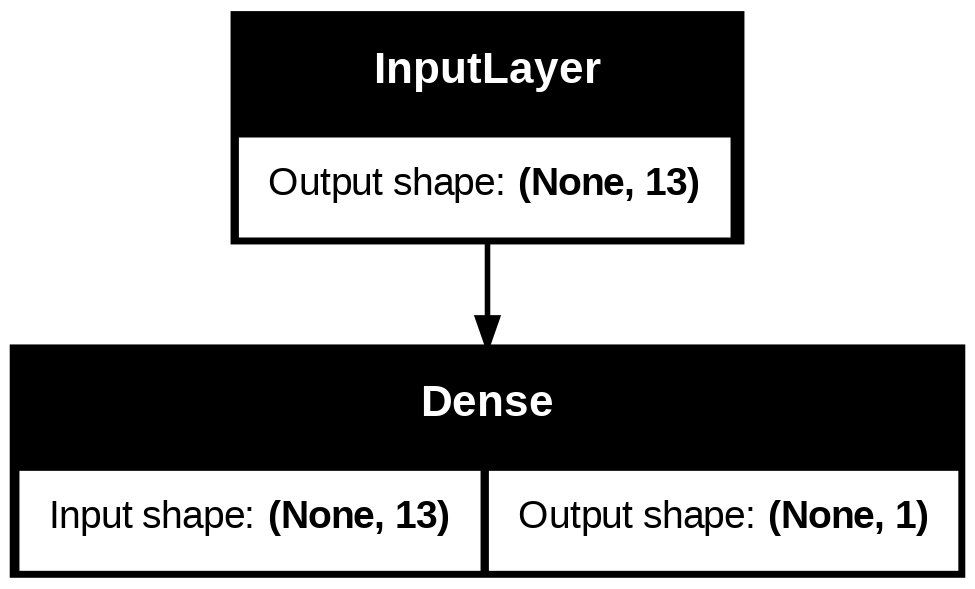

In [29]:
keras.utils.plot_model(model, show_shapes=True)

## Train the model

Train the model with one pass of data.

In [38]:
model.fit(train_data, train_targets)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3173.9148 


Train the model with 200 pass of data, and record the training accuracy in the `history` object.



In [39]:
history = model.fit(train_data, train_targets, epochs=200)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 681.1091 
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 233.9435 
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 179.2886 
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112.6535 
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.3419 
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85.2294 
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.5641  
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.6950 
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 62.9849 
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 63.4370 
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.5734 
Epoch 12/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 48.3720 
Epoch 13/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55.7951 
Epoch 14/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54.5292 
Epoch 15/200
13/13 ━━━━━━━━━━━━━━━━━━━

Train the model (with a PrintLoss function)

In [41]:
# Display training progress by printing a single dot for each completed epoch
import time
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0:
            # calculate training time
            t = time.monotonic() - self.time
            # if validation set is included, its loss is recorded in logs['val_loss']
            print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} |'
                  .format(epoch, t, logs['loss']))

history = model.fit(train_data, train_targets, epochs=200, verbose=0,
                    callbacks=[PrintLoss()])

| Epoch    0 | training time   0.03s | train loss  35.65 |
| Epoch   10 | training time   0.44s | train loss  99.76 |
| Epoch   20 | training time   0.78s | train loss  66.30 |
| Epoch   30 | training time   1.13s | train loss  40.23 |
| Epoch   40 | training time   1.54s | train loss  38.52 |
| Epoch   50 | training time   2.13s | train loss  42.30 |
| Epoch   60 | training time   2.62s | train loss  31.07 |
| Epoch   70 | training time   3.09s | train loss  54.77 |
| Epoch   80 | training time   3.52s | train loss  35.70 |
| Epoch   90 | training time   4.03s | train loss  77.67 |
| Epoch  100 | training time   4.55s | train loss  64.42 |
| Epoch  110 | training time   5.04s | train loss  48.61 |
| Epoch  120 | training time   5.42s | train loss  37.48 |
| Epoch  130 | training time   5.88s | train loss  47.90 |
| Epoch  140 | training time   6.30s | train loss  34.79 |
| Epoch  150 | training time   6.77s | train loss  42.60 |
| Epoch  160 | training time   7.19s | train loss  30.22

### Plot the historical error

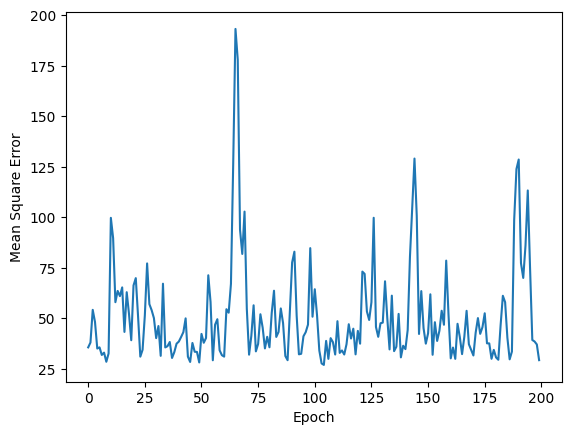

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['loss'],
             label='Train Error')
    plt.show()

plot_history(history)

## Predict housing price in the test set

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


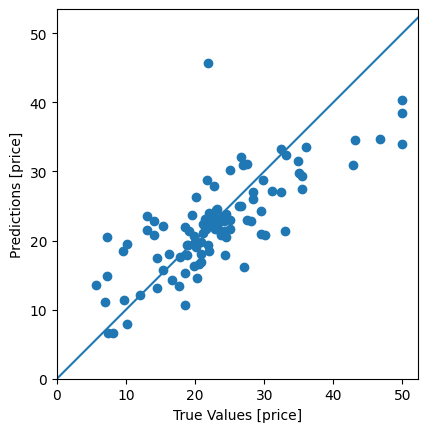

In [43]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Evaluate the Model on the test set

In [51]:
model.evaluate(test_data, test_targets, verbose=0)

34.41420364379883